# Manipulação e visualização de dados com Python


## Módulos essenciais

* Pandas (import pandas as pd)

* Matplotlib (import matplotlib.pyplot as plt)

* OS (import os)

* Numpy (import numpy as np)

### Outros módulos úteis

* zipfile

* Requests

* openpyxl

* py2pdf

* seaborn

In [2]:
import pandas as pd
import zipfile
from urllib.request import urlretrieve
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Coleta/extração dos dados

#### De um arquivo disponível na internet...

In [16]:
url = 'http://databank.worldbank.org/data/download/CPIA_csv.zip'

## Baixa o arquivo para o diretório ativo

filename, request = urlretrieve(url, 'CPIA_csv.zip')
print(os.path.exists(filename))

## Desempacota o arquivo e carrega bancos em uma lista

bancos_zip = dict()

with zipfile.ZipFile(filename) as zipped:
    for file in zipped.namelist():
        with zipped.open(file) as data:
            bancos_zip[file] = pd.read_csv(data)
        
## Carrega o banco maior à parte

df = bancos_zip['CPIAData.csv']

True


### De um arquivo salvo na máquina

In [ ]:
df_local = pd.read_excel(filename)

## Tratamento de dados

Vamos investigar o banco de dados extraído

In [14]:
print(df.shape)
print(df.info())
df.head(3)

(1995, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 19 columns):
Country Name      1995 non-null object
Country Code      1995 non-null object
Indicator Name    1995 non-null object
Indicator Code    1995 non-null object
2005              1762 non-null float64
2006              1803 non-null float64
2007              1804 non-null float64
2008              1806 non-null float64
2009              1848 non-null float64
2010              1848 non-null float64
2011              1890 non-null float64
2012              1932 non-null float64
2013              1953 non-null float64
2014              1848 non-null float64
2015              1848 non-null float64
2016              1785 non-null float64
2017              1557 non-null float64
2018              1701 non-null float64
Unnamed: 18       0 non-null float64
dtypes: float64(15), object(4)
memory usage: 296.2+ KB
None


,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 18
0,IDA countries classified as fragile situations...,FXS,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,2.833333,2.857143,2.857143,2.857143,2.8125,2.8125,2.90,3.000000,3.041667,3.125000,3.125000,3.083333,NaN,3.076923,NaN
1,IDA countries classified as fragile situations...,FXS,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,2.833333,2.785714,2.928571,3.000000,3.0000,3.0000,2.80,2.772727,2.750000,2.750000,2.583333,2.625000,NaN,2.538462,NaN
2,IDA countries classified as fragile situations...,FXS,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,3.500000,3.428571,3.428571,3.428571,3.5000,3.1250,3.05,2.863636,3.000000,2.916667,2.958333,2.791667,NaN,2.884615,NaN


In [17]:
df2 = df.groupby('Indicator Name').mean().dropna(axis=1).transpose()
df2 = df2.set_index(pd.to_datetime(df2.index))
print(df2.shape)
print(df2.info())
df2.head()

(14, 21)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2005-01-01 to 2018-01-01
Data columns (total 21 columns):
CPIA building human resources rating (1=low to 6=high)                                             14 non-null float64
CPIA business regulatory environment rating (1=low to 6=high)                                      14 non-null float64
CPIA debt policy rating (1=low to 6=high)                                                          14 non-null float64
CPIA economic management cluster average (1=low to 6=high)                                         14 non-null float64
CPIA efficiency of revenue mobilization rating (1=low to 6=high)                                   14 non-null float64
CPIA equity of public resource use rating (1=low to 6=high)                                        14 non-null float64
CPIA financial sector rating (1=low to 6=high)                                                     14 non-null float64
CPIA fiscal policy rating (1=low to

Indicator Name,CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),CPIA financial sector rating (1=low to 6=high),CPIA fiscal policy rating (1=low to 6=high),CPIA gender equality rating (1=low to 6=high),CPIA macroeconomic management rating (1=low to 6=high),...,CPIA policy and institutions for environmental sustainability rating (1=low to 6=high),CPIA property rights and rule-based governance rating (1=low to 6=high),CPIA public sector management and institutions cluster average (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),CPIA quality of public administration rating (1=low to 6=high),CPIA social protection rating (1=low to 6=high),CPIA structural policies cluster average (1=low to 6=high),CPIA trade rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)",IDA resource allocation index (1=low to 6=high)
2005-01-01,3.374341,3.285636,3.380544,3.493932,3.413911,3.345545,3.103018,3.395371,3.419860,3.705882,...,3.106392,2.915957,3.077583,3.195986,2.971824,3.105843,3.366196,3.709933,2.878333,3.302273
2006-01-01,3.372268,3.204412,3.374476,3.498536,3.379731,3.342185,3.120226,3.399134,3.406377,3.713851,...,3.061552,2.880734,3.053856,3.188629,2.947456,3.085721,3.356722,3.747339,2.871293,3.288889
2007-01-01,3.392908,3.254313,3.437482,3.519229,3.399115,3.369051,3.141057,3.411776,3.400509,3.708429,...,3.082398,2.880478,3.064793,3.205907,2.966925,3.080903,3.389493,3.773108,2.871542,3.309922
2008-01-01,3.411016,3.241262,3.466327,3.512733,3.412304,3.339208,3.085478,3.431732,3.399056,3.636968,...,3.072282,2.874327,3.065847,3.209696,2.976170,3.118935,3.371318,3.785101,2.856737,3.306385
2009-01-01,3.390734,3.237878,3.431040,3.513386,3.452408,3.403256,3.067777,3.440672,3.396167,3.668446,...,3.071152,2.885020,3.086834,3.256255,2.980075,3.116986,3.383350,3.844394,2.860412,3.314807


## Análise e Visualização de dados

<bound method NDFrame.describe of Indicator Name  CPIA building human resources rating (1=low to 6=high)  \
2005-01-01                                               3.374341        
2006-01-01                                               3.372268        
2007-01-01                                               3.392908        
2008-01-01                                               3.411016        
2009-01-01                                               3.390734        
2010-01-01                                               3.436089        
2011-01-01                                               3.528494        
2012-01-01                                               3.560137        
2013-01-01                                               3.584607        
2014-01-01                                               3.593146        
2015-01-01                                               3.587018        
2016-01-01                                               3.592605        
2017

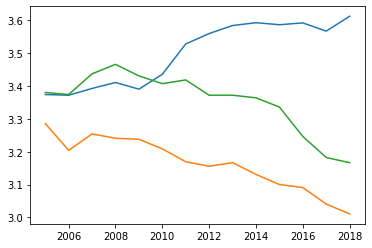

In [7]:
print(np.corrcoef(df2.transpose().iloc[:3]))
plt.plot(df2.iloc[:,:3])